In [61]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM


In [62]:
df=pd.read_csv('SBIN.NS (1).csv',index_col='Date',parse_dates=True)

In [63]:
df.shape

(1232, 6)

In [64]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-05,222.800003,222.800003,217.000000,217.750000,211.052200,15074848
2016-01-06,217.899994,219.899994,216.399994,216.850006,210.179871,11921123
2016-01-07,214.000000,214.100006,209.000000,209.550003,203.104416,14342279
2016-01-08,212.000000,212.500000,208.600006,208.949997,202.522873,11745840
2016-01-11,206.800003,207.500000,202.649994,204.300003,198.015900,19287860


In [65]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-29,276.299988,279.899994,274.700012,277.899994,275.357758,45032526
2020-12-30,278.000000,278.700012,272.500000,276.899994,274.366882,30971894
2020-12-31,275.000000,277.250000,272.600006,274.950012,272.434753,29467966
2021-01-01,274.899994,280.000000,274.399994,279.399994,276.844025,24531791
2021-01-04,281.850006,283.899994,277.750000,281.049988,278.478912,31450608


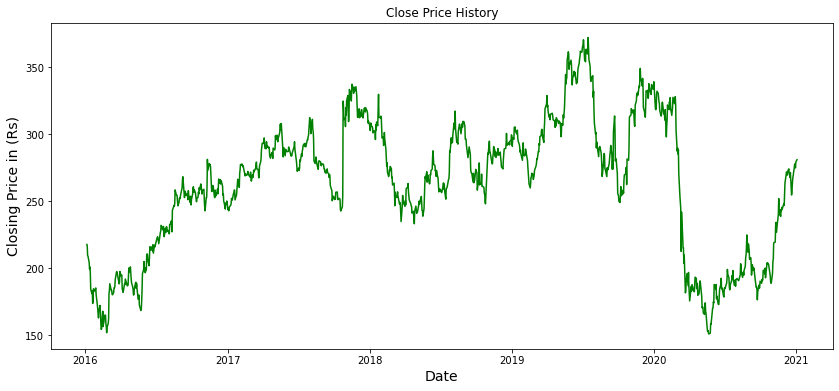

In [66]:
plt.figure(figsize=(14,6))
plt.title('Close Price History')
plt.plot(df['Close'],color='green')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Closing Price in (Rs)',fontsize=14)
plt.show()

In [67]:
data =df.filter(['Close']) 
dataset=data.values    
training_data_len=math.ceil(len(dataset) * .8) 
training_data_len

986

In [68]:
scaler= MinMaxScaler(feature_range=(0,1)) 
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.30196343],
       [0.29790117],
       [0.26495148],
       ...,
       [0.56014449],
       [0.58023017],
       [0.58767768]])

In [69]:
train_data=scaled_data[0:training_data_len, :]
x_train=[] 
y_train=[]   
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.30196343, 0.29790117, 0.26495148, 0.26224326, 0.2412548 ,
       0.21913785, 0.22590833, 0.20401715, 0.15098171, 0.13608664,
       0.14488825, 0.10291126, 0.11171294, 0.15233582, 0.14488825,
       0.15143304, 0.15526967, 0.1311216 , 0.098849  , 0.08372823,
       0.06860753, 0.05416385, 0.07831186, 0.09614078, 0.07312118,
       0.03678625, 0.0153464 , 0.01782892, 0.07673212, 0.02505073,
       0.03656056, 0.04039719, 0.06251407, 0.06364248, 0.03452943,
       0.0245994 , 0.00428796, 0.0227939 , 0.03565784, 0.05055291,
       0.13676366, 0.14398554, 0.16948766, 0.14669376, 0.14691939,
       0.13382982, 0.13202438, 0.13947188, 0.15549537, 0.15504398,
       0.16023472, 0.1823516 , 0.20740239, 0.21056193, 0.20649967,
       0.16903633, 0.1744527 , 0.21078763, 0.19589256, 0.20221165])]
[0.1979236893481573]

[array([0.30196343, 0.29790117, 0.26495148, 0.26224326, 0.2412548 ,
       0.21913785, 0.22590833, 0.20401715, 0.15098171, 0.13608664,
       0.14488825, 0.10291126, 0.111

In [70]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [71]:
x_train.shape

(926, 60)

In [72]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(926, 60, 1)

In [73]:
model =Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1))) 
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [74]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [75]:
model.fit(x_train,y_train,batch_size=1,epochs=1,verbose=1)

926/926 [==============================] - 18s 18ms/step - loss: 0.0061


In [76]:
test_data= scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [77]:
x_test=np.array(x_test)

In [78]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [79]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [80]:
rsme=np.sqrt(np.mean(predictions-y_test)**2)
rsme

6.1200917614448365

<ipython-input-81-f34d7fd7cd02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


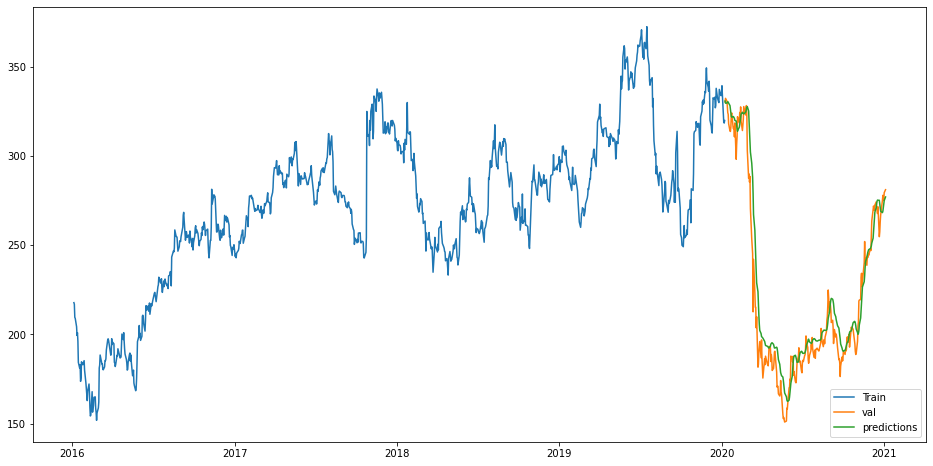

In [81]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

In [82]:
valid

,Close,Predictions
Date,,
2020-01-09,330.200012,330.709686
2020-01-10,332.250000,329.540741
2020-01-13,330.750000,329.552612
2020-01-14,328.000000,330.016479
2020-01-15,324.250000,330.351196
...,...,...
2020-12-29,277.899994,269.014893
2020-12-30,276.899994,270.920685
2020-12-31,274.950012,273.093292


In [83]:
ndf=df.filter(['Close'])
last_60_days=ndf[-60:].values
last_60_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[279.00998]]


In [ ]:
#279.0098 predicted price 
#281 actual price 